<a href="https://colab.research.google.com/github/FendyDeveloper/sentiment-analysis/blob/main/Sentiment_Analysis_Gojek_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen Ulasan Pengguna Aplikasi Gojek: Mengukur Kepuasan Pengguna dengan Teknik NLP**

Proyek ini bertujuan untuk menganalisis sentimen ulasan pengguna aplikasi Gojek di Google Play Store menggunakan teknik **Natural Language Processing (NLP)**. Dengan mengumpulkan ulasan pengguna, proyek ini mengklasifikasikan ulasan menjadi **positif**, **negatif**, atau **netral** berdasarkan teks ulasan dan rating yang diberikan. Tujuannya adalah memahami kepuasan pengguna terhadap aplikasi Gojek dan mengidentifikasi masalah yang sering dikeluhkan, seperti masalah driver, pembayaran, atau bug aplikasi.


Data ulasan diambil dari **Google Play Store** menggunakan library `google-play-scraper`. Ulasan tersebut kemudian diproses melalui beberapa tahap, termasuk **cleaning** (menghapus karakter khusus, link, dan tanda baca), **case folding** (mengubah teks menjadi huruf kecil), **tokenisasi** (memecah teks menjadi kata-kata), **stopword removal** (menghapus kata-kata umum), dan **stemming** (mengurangi kata ke bentuk dasarnya). Setelah itu, teks ulasan diubah menjadi representasi numerik menggunakan **TF-IDF** untuk mempersiapkan data dalam pemodelan.


Proyek ini menggunakan algoritma **Random Forest**, **Decision Tree**, **Naive Bayes** atau **Logistic Regression** untuk melatih model klasifikasi sentimen. Data dibagi menjadi **training set** dan **testing set** dengan proporsi 80:20. Model dievaluasi menggunakan metrik akurasi, dan hasilnya digunakan untuk memprediksi sentimen dari teks ulasan baru. Dengan demikian, proyek ini tidak hanya memberikan wawasan tentang kepuasan pengguna, tetapi juga membantu pengembang Gojek dalam mengambil langkah perbaikan untuk meningkatkan kualitas layanan.


Hasil analisis ini sangat bermanfaat bagi **pengembang Gojek** untuk memahami pain point pengguna, bagi **pengguna** sebagai wadah menyampaikan umpan balik, dan bagi **data scientist** sebagai portofolio proyek nyata yang relevan dengan industri. Proyek ini menunjukkan bagaimana teknik NLP dan machine learning dapat diterapkan untuk memberikan solusi berbasis data dalam meningkatkan pengalaman pengguna.

# Import Library

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import reviews_all, Sort, reviews_all, app

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

pd.options.mode.chained_assignment = None
np.random.seed(0)
sns.set()

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Scrapping Dataset

Penjelasan singkat

In [ ]:
scrapreview = reviews_all(
    'com.grabtaxi.passenger',  # ID aplikasi
    sleep_milliseconds=0,  # Waktu tunggu antara request
    lang='id',  # Bahasa ulasan
    country='id',  # Negara aplikasi
    sort=Sort.MOST_RELEVANT,  # Urutan ulasan
    count=10000  # Jumlah ulasan yang diambil
)

# Loading Dataset

In [ ]:
import csv

# Membuat file CSV dan menulis header
with open('gojek_reviews.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Ulasan'])  # Menulis header

    # Menulis ulasan ke file CSV
    for review in scrapreview:
        writer.writerow([review['content']])

# Loading Dataset

In [ ]:
# Membuat DataFrame dari ulasan
app_reviews_df = pd.DataFrame(scrapreview)

# Menampilkan informasi DataFrame
print("Ukuran DataFrame:", app_reviews_df.shape)
print("5 Baris Pertama DataFrame:")
print(app_reviews_df.head())

# Menyimpan DataFrame ke file CSV
app_reviews_df.to_csv('gojek_reviews.csv', index=None)

Ukuran DataFrame: (108000, 11)
5 Baris Pertama DataFrame:
                               reviewId         userName  \
0  a81c63d8-387a-4116-9f5d-ac729e9f14da  Pengguna Google   
1  f320c93e-30b6-47f7-bda6-2178efe5cdad  Pengguna Google   
2  2aef357d-8106-4416-92d9-f58871413480  Pengguna Google   
3  177c4a76-0903-4822-aeeb-6632b418d978  Pengguna Google   
4  17aa9ce1-ef53-41f5-a4c0-849e8f1692c5  Pengguna Google   

                                                                                                                  userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
1  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
3  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWf

In [ ]:
# Membaca file CSV


# Mendapatkan ukuran DataFrame
total_review, total_kolom = app_reviews_df.shape

# Menampilkan informasi
print(f"Jumlah Review: {total_review}")
print(f"Jumlah Kolom: {total_kolom}")

# Menampilkan 5 baris pertama DataFrame
print(app_reviews_df.head())

Jumlah Review: 108000
Jumlah Kolom: 11
                               reviewId         userName  \
0  a81c63d8-387a-4116-9f5d-ac729e9f14da  Pengguna Google   
1  f320c93e-30b6-47f7-bda6-2178efe5cdad  Pengguna Google   
2  2aef357d-8106-4416-92d9-f58871413480  Pengguna Google   
3  177c4a76-0903-4822-aeeb-6632b418d978  Pengguna Google   
4  17aa9ce1-ef53-41f5-a4c0-849e8f1692c5  Pengguna Google   

                                                                                                                  userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
1  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
2  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
3  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7

In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              108000 non-null  object        
 1   userName              108000 non-null  object        
 2   userImage             108000 non-null  object        
 3   content               108000 non-null  object        
 4   score                 108000 non-null  int64         
 5   thumbsUpCount         108000 non-null  int64         
 6   reviewCreatedVersion  88120 non-null   object        
 7   at                    108000 non-null  datetime64[ns]
 8   replyContent          28097 non-null   object        
 9   repliedAt             28097 non-null   datetime64[ns]
 10  appVersion            88120 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.1+ MB


In [ ]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN)
clean_df = app_reviews_df.dropna()

In [ ]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21617 entries, 2 to 107999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              21617 non-null  object        
 1   userName              21617 non-null  object        
 2   userImage             21617 non-null  object        
 3   content               21617 non-null  object        
 4   score                 21617 non-null  int64         
 5   thumbsUpCount         21617 non-null  int64         
 6   reviewCreatedVersion  21617 non-null  object        
 7   at                    21617 non-null  datetime64[ns]
 8   replyContent          21617 non-null  object        
 9   repliedAt             21617 non-null  datetime64[ns]
 10  appVersion            21617 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 2.0+ MB


In [ ]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

# Preprocessing

## Fungsi untuk Membersihkan dan Memproses Teks

Berikut adalah penjelasan lebih sederhana tentang beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Fungsi-fungsi ini membantu Anda menyiapkan teks sebelum melakukan analisis lebih lanjut, seperti analisis sentimen.

---

### `cleaningText(text)`  
Fungsi ini **membersihkan teks** dengan cara:
- Menghapus **mention**, **hashtag**, **RT (retweet)**, **tautan (link)**, **angka**, dan **tanda baca**.
- Mengganti karakter **newline** (`\n`) dengan spasi.
- Menghilangkan **spasi ekstra** di awal dan akhir teks.

---

### `casefoldingText(text)`  
Fungsi ini **mengubah semua huruf dalam teks menjadi huruf kecil** (lowercase).  
Contohnya: "Aku SUKA makan" → "aku suka makan".  
Tujuannya adalah membuat teks lebih seragam.

---

### `tokenizingText(text)`  
Fungsi ini **membagi teks menjadi daftar kata-kata (token)**.  
Contohnya: "aku suka makan" → `["aku", "suka", "makan"]`.  
Ini membantu memecah teks menjadi unit-unit dasar.

---

### `filteringText(text)`  
Fungsi ini **menghapus kata-kata berhenti (stopwords)**.  
Stopwords adalah kata-kata yang tidak penting, seperti "dan", "yang", atau "di".  
Anda juga bisa menambahkan kata-kata berhenti tambahan sesuai kebutuhan.

---

### `stemmingText(text)`  
Fungsi ini **mengurangi kata-kata menjadi bentuk dasarnya** (stemming).  
Contohnya: "memakan" → "makan".  
Untuk bahasa Indonesia, fungsi ini menggunakan pustaka **Sastrawi**.

---

### `toSentence(list_words)`  
Fungsi ini **menggabungkan daftar kata-kata menjadi sebuah kalimat**.  
Contohnya: `["aku", "suka", "makan"]` → "aku suka makan".

---

## Cara Menggunakan Fungsi-Fungsi Ini  
Gunakan fungsi-fungsi ini secara berurutan untuk membersihkan dan memproses teks. Pastikan untuk **memanggil fungsi-fungsi ini sesuai tahapan** yang Anda inginkan.  

Dengan menggunakan fungsi-fungsi ini, teks akan lebih bersih, terstruktur, dan siap untuk dianalisis!

---

## Membersihkan teks

In [ ]:
def cleaningText(text):
    # Menghapus mention, hashtag, RT, link, dan angka
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)

    # Menggantikan newline dengan spasi
    text = text.replace('\n', ' ')

    # Menghapus spasi di awal dan akhir teks
    text = text.strip(' ')

    return text

## Casefolding Teks

In [ ]:
def casefoldingText(text):
    # Mengubah teks menjadi lowercase
    text = text.lower()
    return text

## Tokenizing Teks

In [ ]:
def tokenizingText(text):
    # Memecah teks menjadi daftar kata
    text = word_tokenize(text)
    return text

## Filtering Text

In [ ]:
def filteringText(text):
    # Membuat daftar stopwords
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])

    # Menghapus stopwords dari daftar kata
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

## Stimming Text

In [ ]:
def stemmingText(text):
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

##  Mengubah Daftar Kata menjadi Kalimat

In [ ]:
def toSentence(list_words):
    # Menggabungkan daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

## Slang words


In [ ]:

slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

# Kamus Slang

Kamus slang adalah **kumpulan kata-kata slang bahasa Indonesia** beserta artinya dalam bahasa formal.

---

## Fungsi Kamus Slang

1. **Mengartikan Slang**  
   Memahami makna kata-kata slang yang tidak familiar.

2. **Komunikasi Informal**  
   Berkomunikasi dengan gaya santai dan sesuai konteks.

3. **Pemahaman Budaya Pop**  
   Mengikuti tren dan perubahan bahasa dalam konteks budaya pop.

4. **Penggunaan Sastra dan Penulisan**  
   Membantu penulis memilih kata-kata slang yang tepat.

5. **Hiburan dan Curiositas**  
   Mempelajari bahasa slang untuk hiburan dan rasa ingin tahu.

---

## Pengingat

- Penggunaan slang harus **disesuaikan dengan konteks dan audiens**.  
- Slang lebih cocok untuk percakapan santai, sedangkan **bahasa formal** lebih sesuai untuk situasi formal.  

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
2,2aef357d-8106-4416-92d9-f58871413480,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"driver bike/car/food bisa meng-cancel atau menolak dengan seenaknya! sehingga membuat pesanan terlambat! tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random, alias kelancaran pesanan tergantung MOOD driver. pengalaman seperti ini bukan sekali dua kali, tapi review ini dibuat karena sudah terlalu MUAK! dengan sistem di Layanan ini. buruk",1,56,5.346.0,2025-02-28 15:03:04,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️ Apabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2025-02-28 16:08:29,5.346.0
3,177c4a76-0903-4822-aeeb-6632b418d978,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi yang driver nya banyak nggak jelas, ditungguin lama banget nggak gerak2, terus nggak ada respon sama sekali, selain itu setiap kali cancel dan coba order lagi, pasti dapat driver yang sama, bikin kesal dan tidak berguna. Selain itu map nya juga nggak bisa nemu kan tempat yang ada di google. Ini juga sekarang nggak bisa zoom map, nggak jelas. Aplikasi bodoh! Selain itu, saya pernah pesan makanan, telat sampai 1 jam, tidak bisa dibatalkan, makanan dingin, saya telat makan, layanan ap ini",1,284,5.348.0,2025-03-08 11:19:28,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2024-03-15 12:25:43,5.348.0
5,37e8bc37-74a1-48a8-8df9-22a2cd01c23b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Menyengsarakan orang, pesan grabfood, sampai satu jam belum dapat driver, udah gitu ga bisa di cancel pula. Tolonglah kalau memang sampai 30 menit belum dapat respon dari resto atau driver beri kemudahan customer untuk cancel pesanannya. Bisa jadi yang pesan sudah laper banget atau butuh segera disajikan, jadi menunggu nggak ada kepastian.",1,34,5.345.0,2025-02-28 14:50:33,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️ Apabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2025-02-28 16:19:13,5.345.0
6,e079649f-2539-495c-a11a-33985bc9bb7c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Setelah di-update malah beberapa fitur dihilangkan. Nggak ada pilihan pengantaran standar/hemat/prioritas lagi setelah di-update. Padahal saya langganan unlimited dari tahun lalu, mungkin next tidak akan saya perpanjang lagi. Menyecewakan.",1,26,5.347.0,2025-02-28 07:50:46,Maaf ya atas ketidaknyamanan yang terjadi.\nKalau Kakak memiliki kendala saat menggunakan aplikasi Grab atau tidak nyaman dengan pelayanan kami silakan pilih keluhan yang sesuai di link berikut ya https://grb.to/consumeridhelpcenter . Terima kasih 🙏,2025-02-28 11:59:55,5.347.0
12,393a0035-f310-49ba-9cf2-884fb9a554a1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi lu terlalu berat,golek yg MB nya sama saja ketika menginstal & buka Aplikasi nya itu gk lebay lemot kaya grab,parah nih aplikasi bukan nya di kembangkan biar lancar di semua hp & enteng,ini malah bikin susah customer!!!!",1,17,5.342.0,2025-02-28 04:15:55,Maaf ya atas ketidaknyamanan yang terjadi.\nKalau Kakak memiliki kendala saat menggunakan aplika

In [ ]:
# Membersihkan teks
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Casefolding teks (mengubah huruf menjadi kecil)
clean_df['text_casefolding'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar
clean_df['text_slangwords'] = clean_df['text_casefolding'].apply(fix_slangwords)

# Tokenizing teks (memecah teks menjadi kata-kata)
clean_df['text_tokenizing'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum)
clean_df['text_stopword'] = clean_df['text_tokenizing'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [ ]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_slangwords,text_tokenizing,text_stopword,text_akhir
2,2aef357d-8106-4416-92d9-f58871413480,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"driver bike/car/food bisa meng-cancel atau menolak dengan seenaknya! sehingga membuat pesanan terlambat! tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random, alias kelancaran pesanan tergantung MOOD driver. pengalaman seperti ini bukan sekali dua kali, tapi review ini dibuat karena sudah terlalu MUAK! dengan sistem di Layanan ini. buruk",1,56,5.346.0,2025-02-28 15:03:04,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️ Apabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2025-02-28 16:08:29,5.346.0,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung MOOD driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu MUAK dengan sistem di Layanan ini buruk,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung mood driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu muak dengan sistem di layanan ini buruk,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung mood driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu muak dengan sistem di layanan ini buruk,"[driver, bikecarfood, bisa, mengcancel, atau, menolak, dengan, seenaknya, sehingga, membuat, pesanan, terlambat, tidak, ada, perintah, otomatis, dari, sistem, yang, mengunci, pesanan, ke, driver, secara, random, alias, kelancaran, pesanan, tergantung, mood, driver, pengalaman, seperti, ini, bukan, sekali, dua, kali, tapi, review, ini, dibuat, karena, sudah, terlalu, muak, dengan, sistem, di, layanan, ini, buruk]","[driver, bikecarfood, mengcancel, menolak, pesanan, terlambat, perintah, otomatis, sistem, mengunci, pesanan, driver, random, alias, kelancaran, pesanan, tergantung, mood, driver, pengalaman, kali, review, muak, sistem, layanan, buruk]",driver bikecarfood mengcancel menolak pesanan terlambat perintah otomatis sistem mengunci pesanan driver random alias kelancaran pesanan tergantung mood driver pengalaman kali review muak sistem layanan buruk
3,177c4a76-0903-4822-aeeb-6632b418d978,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi yang driver nya banyak nggak jelas, ditungguin lama banget nggak gerak2, terus nggak ada respon sama sekali, selain itu setiap kali cancel dan coba order lagi, pasti dapat driver yang sama, bikin kesal dan tidak berguna. Selain itu map nya juga nggak bisa nemu kan tempat yang ada di google. Ini juga sekarang nggak bisa zoom map, nggak jelas. Aplikasi bodoh! Selain itu, saya pernah pesan makanan, telat sampai 1 jam, tidak bisa dibatalkan, makanan dingin, saya telat makan, layanan ap ini",1,284,5.348.0,2025-03-08 11:19:28,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2024-03-15 12:25:43,5.348.0,Aplikasi yang driver nya banyak nggak

Penjelasan akhir prepocessing

# Pelabelan

In [ ]:
import csv
import requests
from io import StringIO

# Mengunduh data kamus kata-kata positif dari GitHub
def load_lexicon_positive():
    lexicon_positive = dict()
    url = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv'
    response = requests.get(url)

    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')
        for row in reader:
            lexicon_positive[row[0]] = int(row[1])
    else:
        print("Gagal mengunduh data kamus kata-kata positif")

    return lexicon_positive

# Mengunduh data kamus kata-kata negatif dari GitHub
def load_lexicon_negative():
    lexicon_negative = dict()
    url = 'https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv'
    response = requests.get(url)

    if response.status_code == 200:
        reader = csv.reader(StringIO(response.text), delimiter=',')
        for row in reader:
            lexicon_negative[row[0]] = int(row[1])
    else:
        print("Gagal mengunduh data kamus kata-kata negatif")

    return lexicon_negative

# Memuat data kamus kata-kata positif dan negatif
lexicon_positive = load_lexicon_positive()
lexicon_negative = load_lexicon_negative()

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    """
    Fungsi untuk menentukan polaritas sentimen dari teks menggunakan kamus Indonesia.

    Parameters:
    text (list): Daftar kata-kata dalam teks

    Returns:
    score (int): Skor sentimen teks
    polarity (str): Polaritas sentimen teks (positif atau negatif)
    """

    # Inisialisasi skor sentimen ke 0
    score = 0

    # Mengulangi setiap kata dalam teks
    for word in text:
        # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
        if word in lexicon_positive:
            score += lexicon_positive[word]

        # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
        elif word in lexicon_negative:
            score += lexicon_negative[word]

    # Inisialisasi variabel polaritas
    polarity = ''

    # Menentukan polaritas sentimen
    if score >= 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'

    # Mengembalikan skor sentimen dan polaritas teks
    return score, polarity

In [ ]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_slangwords,text_tokenizing,text_stopword,text_akhir
2,2aef357d-8106-4416-92d9-f58871413480,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"driver bike/car/food bisa meng-cancel atau menolak dengan seenaknya! sehingga membuat pesanan terlambat! tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random, alias kelancaran pesanan tergantung MOOD driver. pengalaman seperti ini bukan sekali dua kali, tapi review ini dibuat karena sudah terlalu MUAK! dengan sistem di Layanan ini. buruk",1,56,5.346.0,2025-02-28 15:03:04,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️ Apabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2025-02-28 16:08:29,5.346.0,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung MOOD driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu MUAK dengan sistem di Layanan ini buruk,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung mood driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu muak dengan sistem di layanan ini buruk,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung mood driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu muak dengan sistem di layanan ini buruk,"[driver, bikecarfood, bisa, mengcancel, atau, menolak, dengan, seenaknya, sehingga, membuat, pesanan, terlambat, tidak, ada, perintah, otomatis, dari, sistem, yang, mengunci, pesanan, ke, driver, secara, random, alias, kelancaran, pesanan, tergantung, mood, driver, pengalaman, seperti, ini, bukan, sekali, dua, kali, tapi, review, ini, dibuat, karena, sudah, terlalu, muak, dengan, sistem, di, layanan, ini, buruk]","[driver, bikecarfood, mengcancel, menolak, pesanan, terlambat, perintah, otomatis, sistem, mengunci, pesanan, driver, random, alias, kelancaran, pesanan, tergantung, mood, driver, pengalaman, kali, review, muak, sistem, layanan, buruk]",driver bikecarfood mengcancel menolak pesanan terlambat perintah otomatis sistem mengunci pesanan driver random alias kelancaran pesanan tergantung mood driver pengalaman kali review muak sistem layanan buruk
3,177c4a76-0903-4822-aeeb-6632b418d978,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi yang driver nya banyak nggak jelas, ditungguin lama banget nggak gerak2, terus nggak ada respon sama sekali, selain itu setiap kali cancel dan coba order lagi, pasti dapat driver yang sama, bikin kesal dan tidak berguna. Selain itu map nya juga nggak bisa nemu kan tempat yang ada di google. Ini juga sekarang nggak bisa zoom map, nggak jelas. Aplikasi bodoh! Selain itu, saya pernah pesan makanan, telat sampai 1 jam, tidak bisa dibatalkan, makanan dingin, saya telat makan, layanan ap ini",1,284,5.348.0,2025-03-08 11:19:28,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2024-03-15 12:25:43,5.348.0,Aplikasi yang driver nya banyak nggak

In [ ]:
# Menganalisis sentimen teks yang telah dibersihkan
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

# Mengubah hasil analisis sentimen menjadi bentuk yang dapat digunakan
results = list(zip(*results))

# Menambahkan skor polaritas dan polaritas ke DataFrame
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# Mencetak jumlah teks dengan setiap polaritas
print(clean_df['polarity'].value_counts())

polarity
positive    14158
negative     7459
Name: count, dtype: int64


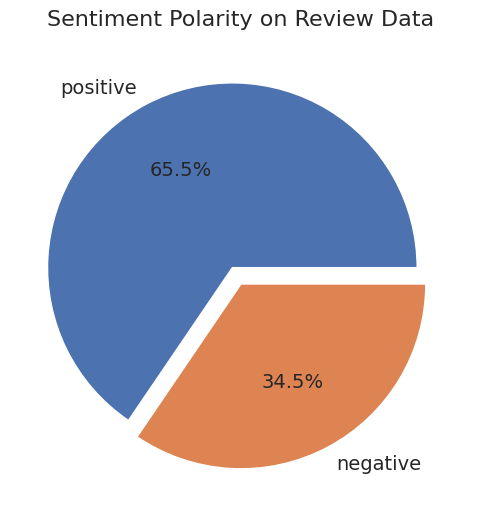

In [ ]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df'
sizes = clean_df['polarity'].value_counts().tolist()

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df'
labels = clean_df['polarity'].value_counts().index.tolist()

# Menentukan seberapa jauh potongan dari pie chart akan ditarik
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode'
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart
plt.show()

In [ ]:
# Mengatur opsi tampilan Pandas
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru untuk tweet dengan sentimen positif
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih kolom-kolom tertentu
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan berdasarkan skor sentimen secara menurun
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks
positive_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru untuk tweet dengan sentimen negatif
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih kolom-kolom tertentu
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan berdasarkan skor sentimen secara menaik
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama
negative_tweets = negative_tweets.head(10)

# Mengatur ulang indeks
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks
negative_tweets.index += 1

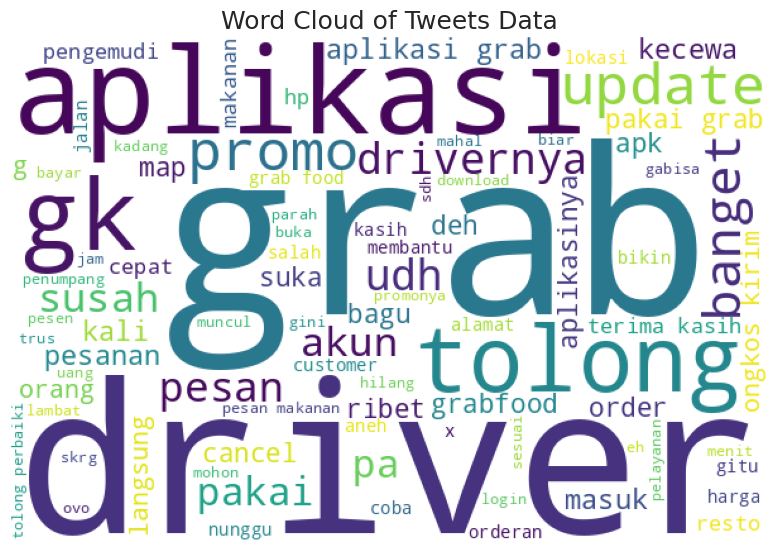

In [ ]:
# Mengumpulkan semua kata dari teks yang sudah dibersihkan
list_words = ' '.join([word for tweet in clean_df['text_stopword'] for word in tweet])

# Membuat objek WordCloud
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10
).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud)

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

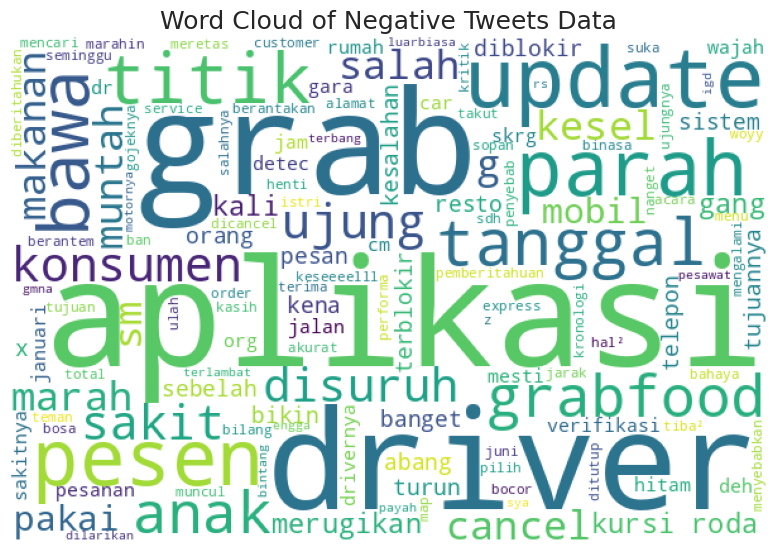

In [ ]:
# Mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif
list_words = ' '.join([word for tweet in negative_tweets['text_stopword'] for word in tweet])

# Membuat objek WordCloud
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10
).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud)

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

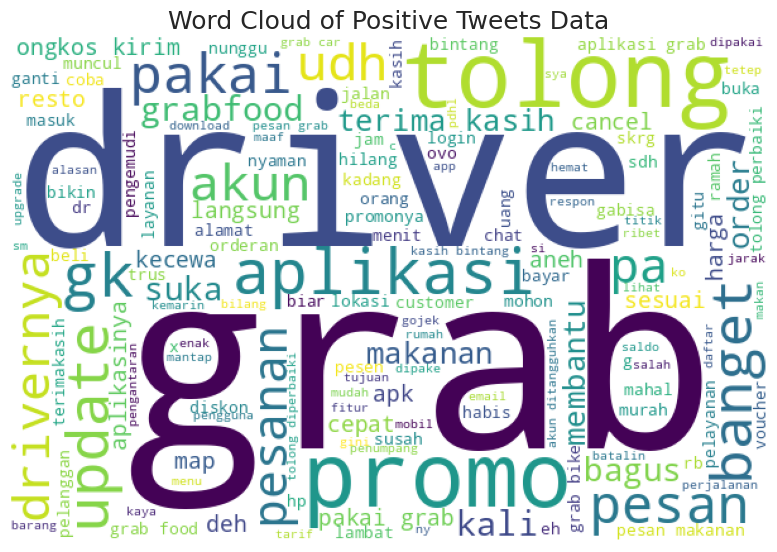

In [ ]:
# Mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif
list_words = ' '.join([word for tweet in positive_tweets['text_stopword'] for word in tweet])

# Membuat objek WordCloud
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10
).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud)

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

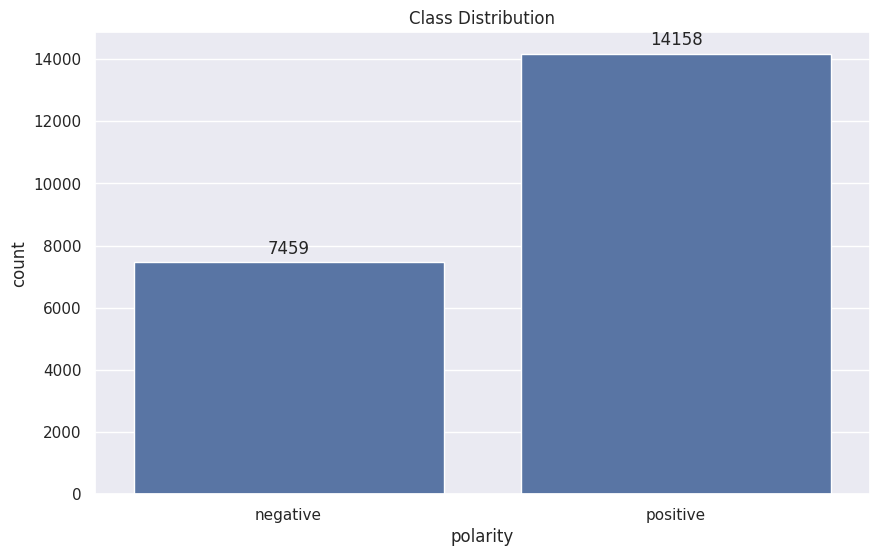

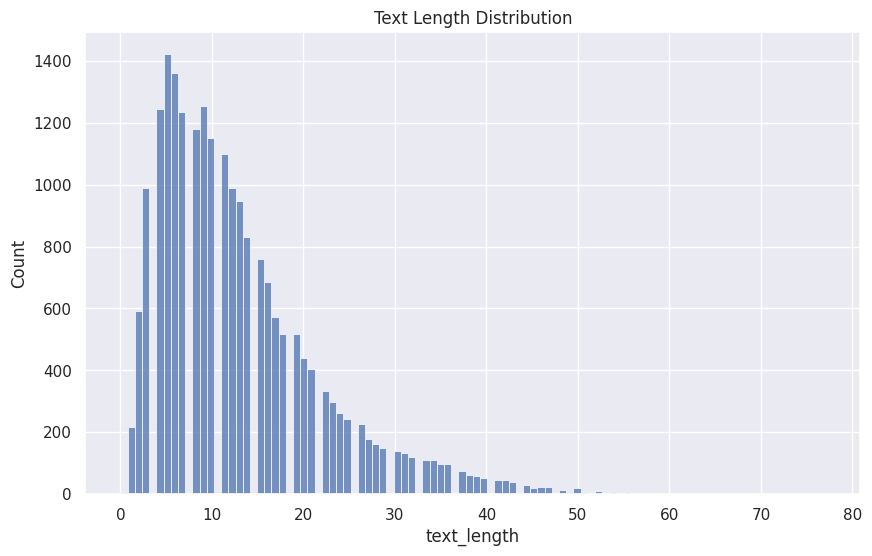

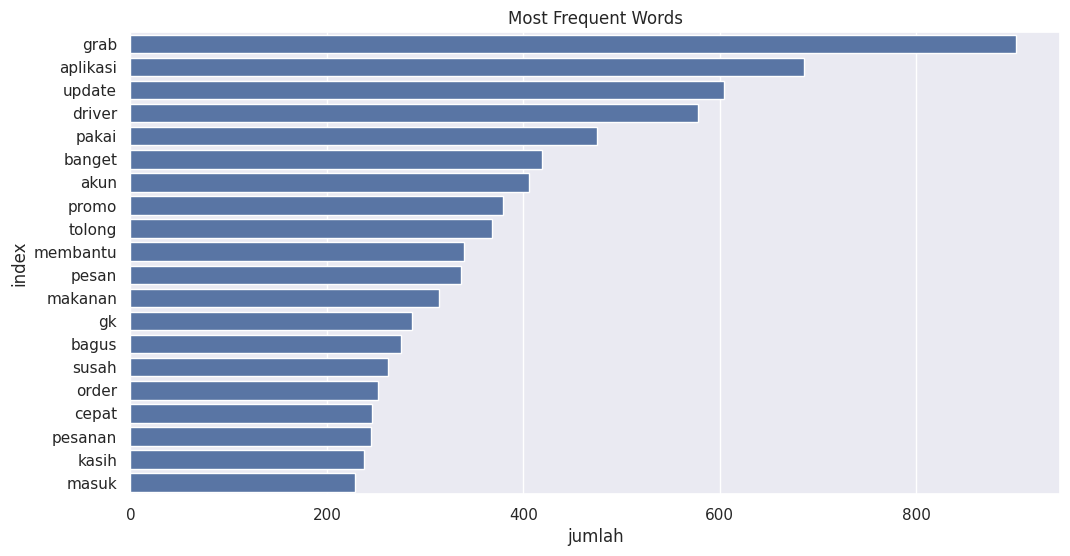

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Visualisasi Distribusi Kelas
plt.figure(figsize=(10, 6))
sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 10),
                         textcoords='offset points')

plt.show()

# Visualisasi Panjang Teks
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Visualisasi Kata yang Paling Sering Muncul
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

# Data Splitting

In [ ]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefolding,text_slangwords,text_tokenizing,text_stopword,text_akhir,polarity_score,polarity,text_length
2,2aef357d-8106-4416-92d9-f58871413480,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"driver bike/car/food bisa meng-cancel atau menolak dengan seenaknya! sehingga membuat pesanan terlambat! tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random, alias kelancaran pesanan tergantung MOOD driver. pengalaman seperti ini bukan sekali dua kali, tapi review ini dibuat karena sudah terlalu MUAK! dengan sistem di Layanan ini. buruk",1,56,5.346.0,2025-02-28 15:03:04,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️ Apabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2025-02-28 16:08:29,5.346.0,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung MOOD driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu MUAK dengan sistem di Layanan ini buruk,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung mood driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu muak dengan sistem di layanan ini buruk,driver bikecarfood bisa mengcancel atau menolak dengan seenaknya sehingga membuat pesanan terlambat tidak ada perintah otomatis dari sistem yang mengunci pesanan ke driver secara random alias kelancaran pesanan tergantung mood driver pengalaman seperti ini bukan sekali dua kali tapi review ini dibuat karena sudah terlalu muak dengan sistem di layanan ini buruk,"[driver, bikecarfood, bisa, mengcancel, atau, menolak, dengan, seenaknya, sehingga, membuat, pesanan, terlambat, tidak, ada, perintah, otomatis, dari, sistem, yang, mengunci, pesanan, ke, driver, secara, random, alias, kelancaran, pesanan, tergantung, mood, driver, pengalaman, seperti, ini, bukan, sekali, dua, kali, tapi, review, ini, dibuat, karena, sudah, terlalu, muak, dengan, sistem, di, layanan, ini, buruk]","[driver, bikecarfood, mengcancel, menolak, pesanan, terlambat, perintah, otomatis, sistem, mengunci, pesanan, driver, random, alias, kelancaran, pesanan, tergantung, mood, driver, pengalaman, kali, review, muak, sistem, layanan, buruk]",driver bikecarfood mengcancel menolak pesanan terlambat perintah otomatis sistem mengunci pesanan driver random alias kelancaran pesanan tergantung mood driver pengalaman kali review muak sistem layanan buruk,-13,negative,26
3,177c4a76-0903-4822-aeeb-6632b418d978,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi yang driver nya banyak nggak jelas, ditungguin lama banget nggak gerak2, terus nggak ada respon sama sekali, selain itu setiap kali cancel dan coba order lagi, pasti dapat driver yang sama, bikin kesal dan tidak berguna. Selain itu map nya juga nggak bisa nemu kan tempat yang ada di google. Ini juga sekarang nggak bisa zoom map, nggak jelas. Aplikasi bodoh! Selain itu, saya pernah pesan makanan, telat sampai 1 jam, tidak bisa dibatalkan, makanan dingin, saya telat makan, layanan ap ini",1,284,5.348.0,2025-03-08 11:19:28,Halo Kak. Maaf ya buat engga nyaman 🙇‍♀️\nApabila Kakak menemukan kendala pada penggunaan aplikasi Grab Penumpang maka silakan laporkan melalui link https://grb.to/consumeridhelpcenter agar bisa ditindaklanjuti ya.Terima kasih 🙏,2024-03-15 12

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']  # Fitur (tweet)
y = clean_df['polarity']     # Label (sentimen)

In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,akun,alamat,alasan,ambil,aneh,apk,aplikasi,aplikasinya,app,bagus,...,tunai,tutup,uang,udh,ulang,uninstall,update,upgrade,verifikasi,voucher
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.257075,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.500089,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21612,0.0,0.0,0.0,0.0,0.0,0.0,0.344326,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21613,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21614,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Pemodelan Naice Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

# Menampilkan akurasi
print('Naive Bayes - Akurasi Pelatihan:', accuracy_train_nb)
print('Naive Bayes - Akurasi Pengujian:', accuracy_test_nb)

Naive Bayes - Akurasi Pelatihan: 0.7987625050598508
Naive Bayes - Akurasi Pengujian: 0.8073543015726179


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Menampilkan akurasi
print('Random Forest - Akurasi Pelatihan:', accuracy_train_rf)
print('Random Forest - Akurasi Pengujian:', accuracy_test_rf)

Random Forest - Akurasi Pelatihan: 0.9861793789394553
Random Forest - Akurasi Pengujian: 0.8246993524514339


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

# Menampilkan akurasi
print('Logistic Regression - Akurasi Pelatihan:', accuracy_train_lr)
print('Logistic Regression - Akurasi Pengujian:', accuracy_test_lr)

Logistic Regression - Akurasi Pelatihan: 0.8527149713757012
Logistic Regression - Akurasi Pengujian: 0.856845513413506


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

# Menampilkan akurasi
print('Decision Tree - Akurasi Pelatihan:', accuracy_train_dt)
print('Decision Tree - Akurasi Pengujian:', accuracy_test_dt)

Decision Tree - Akurasi Pelatihan: 0.9861793789394553
Decision Tree - Akurasi Pengujian: 0.7580943570767807


In [ ]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})

# Menampilkan hasil akurasi pengujian
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print("Hasil Akurasi Pengujian:")
print(accuracy_test_only)

Hasil Akurasi Pengujian:
                 Model  Accuracy Test
0          Naive Bayes       0.807354
1        Random Forest       0.824699
2  Logistic Regression       0.856846
3        Decision Tree       0.758094


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print("Hasil Akurasi Pengujian (Terurut):")
print(accuracy_test_sorted)

Hasil Akurasi Pengujian (Terurut):
                 Model  Accuracy Test
2  Logistic Regression       0.856846
1        Random Forest       0.824699
0          Naive Bayes       0.807354
3        Decision Tree       0.758094


Dalam kasus Sentiment Analysis ini, algoritma Logistic Regression mencapai akurasi tertinggi sebesar 85,56%. Berdasarkan hasil tersebut, algoritma Logistic Regression dipilih sebagai model utama untuk memprediksi sentimen pada kalimat-kalimat baru karena kemampuannya dalam memprediksi sentimen dengan akurasi yang tinggi.

In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: Aplikasi jelek
Sentimen kalimat baru adalah NEGATIF.


In [ ]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.5.0
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.6.0
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.3.0.34.45
astunparse==1.6.3
atpublic==4.1.0
attrs==25.1.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.